In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df.shape

(32581, 12)

In [5]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [6]:
df['person_emp_length'].value_counts()

person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [7]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [8]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [9]:
df['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
2     5965
3     5943
4     5925
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: count, dtype: int64

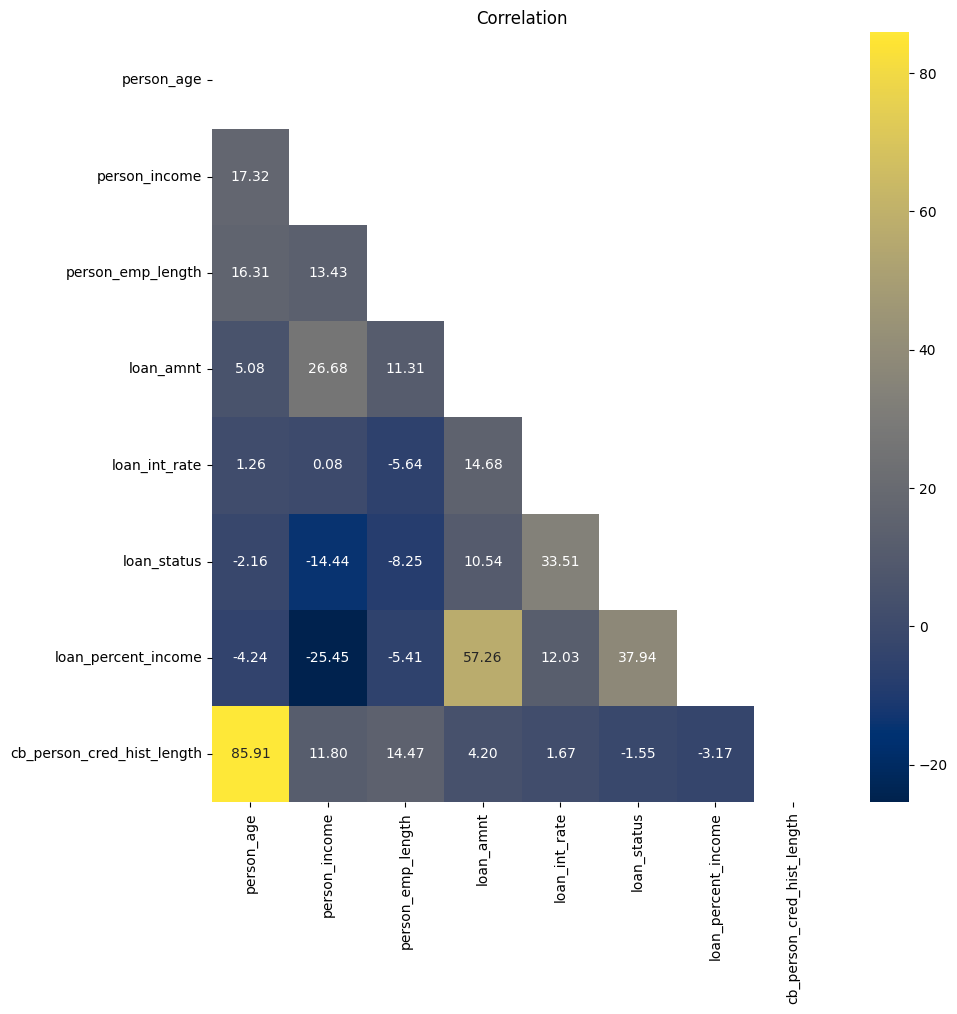

In [10]:
plt.figure(figsize=(10, 10)) 
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, fmt='.2f', mask=mask)
plt.title('Correlation')
plt.show()

In [11]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [12]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [14]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['loan_grade']=le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])

In [16]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [17]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
X=df.drop(['loan_status'],axis=1).values
y=df['loan_status'].values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
X_train

array([[-0.43340234,  0.58547569, -1.17429149, ..., -0.74577645,
        -0.46638619, -0.69441265],
       [-0.74852651,  1.27364339,  0.91835148, ..., -1.30868996,
        -0.46638619, -0.94286645],
       [ 0.98465644, -0.48500741,  0.91835148, ...,  0.56768841,
        -0.46638619,  0.79631016],
       ...,
       [-0.9060886 , -0.65322618,  0.22080382, ...,  0.75532624,
         2.14414583, -0.44595885],
       [ 0.3544081 ,  2.42058956,  0.91835148, ..., -0.55813862,
        -0.46638619,  1.04476396],
       [ 0.82709436,  0.76898708, -1.17429149, ...,  0.0047749 ,
        -0.46638619,  0.05094875]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=150)
classifier1.fit(X_train,y_train)


RandomForestClassifier(n_estimators=150)

In [25]:
y_pred=classifier1.predict(X_test)

In [26]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [27]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4420   23]
 [ 375  910]]


0.9305167597765364

In [29]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)

In [30]:
import xgboost

In [31]:
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = classifier2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4406   37]
 [ 337  948]]


0.9347067039106145

In [34]:
from sklearn.linear_model import LogisticRegression
classifier4=LogisticRegression(random_state=0)
classifier4.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = classifier4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4229  214]
 [ 707  578]]


0.8392108938547486

In [37]:
from sklearn.svm import SVC
classifier5=SVC(kernel='linear',random_state=0)
classifier5.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred=classifier5.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
np.concatenate((y_pred,y_test),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 0]])

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4255  188]
 [ 750  535]]


0.8362430167597765

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier6=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier6.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred=classifier6.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
np.concatenate((y_pred,y_test),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[4126  317]
 [ 293  992]]


0.8935055865921788

In [43]:
import tensorflow as tf

2024-04-06 12:00:39.023071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 12:00:39.023185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 12:00:39.194730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8175 - loss: 0.4357
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8520 - loss: 0.3616
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8635 - loss: 0.3454
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8644 - loss: 0.3339
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8698 - loss: 0.3243
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8742 - loss: 0.3200
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss: 0.3036
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8782 - loss: 0.3119
Epoch 9/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.2910
Epoch 10/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8890 - loss: 0.2958
Epoch 11/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.2973
Epoch 12/100
716/716 ━━━━━━━━━━━━━━━━━━━━

In [46]:
y_pred=model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step


In [47]:
y_pred=y_pred>0.5

In [48]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.7693032015065913

In [49]:
precision_score(y_test,y_pred)

0.9737783075089392

In [50]:
confusion_matrix(y_test,y_pred)

array([[4421,   22],
       [ 468,  817]])

In [51]:
recall_score(y_test,y_pred)

0.6357976653696498

<Axes: >

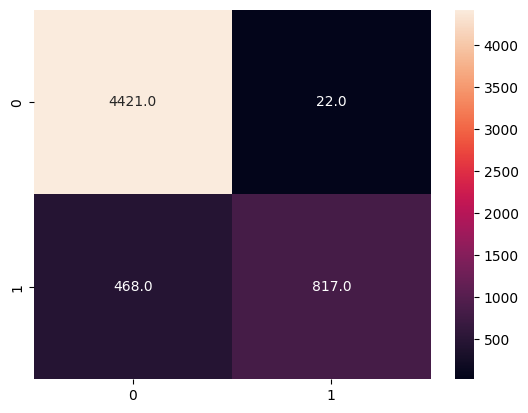

In [52]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.1f')